In [ ]:
import numpy as np
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Get the data from csv files

In [ ]:
read_train = pd.read_csv('/content/drive/My Drive/MPR PROJECT/D_Train1.csv')
train = pd.DataFrame(read_train)
read_test = pd.read_csv('/content/drive/My Drive/MPR PROJECT/D_Test1.csv')
test = pd.DataFrame(read_test)

In [ ]:
test.shape

(400, 8)

In [ ]:
train

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7
0,1,-62,-55,-65,-59,-69,-86,-87
1,1,-61,-56,-65,-65,-66,-77,-81
2,1,-62,-58,-57,-65,-70,-82,-91
3,1,-59,-57,-60,-60,-63,-81,-77
4,1,-69,-58,-56,-61,-73,-81,-93
...,...,...,...,...,...,...,...,...
1595,4,-61,-57,-53,-65,-50,-87,-91
1596,4,-59,-51,-56,-59,-51,-87,-86
1597,4,-58,-60,-50,-61,-50,-87,-78
1598,4,-62,-62,-49,-66,-47,-93,-80


Extracting the features from  train data to 4

In [ ]:
#Create arrays for mean feature
T_mean = np.zeros((len(train),1))
#Y_mean = np.zeros((len(train),1))
#Z_mean = np.zeros((len(train),1))
#Create arrays for std dev feature
T_std = np.zeros((len(train),1))
#Y_std = np.zeros((len(train),1))
#Z_std = np.zeros((len(train),1))
#Create arrays for minimum feature
T_min = np.zeros((len(train),1))
#Y_min = np.zeros((len(train),1))
#Z_min = np.zeros((len(train),1))
#Create arrays for maximum feature
T_max = np.zeros((len(train),1))
#Y_max = np.zeros((len(train),1))
#Z_max = np.zeros((len(train),1))
#Number of markers
#N_markers = np.zeros((len(train),1))

for i in range(1, len(train)):
  T_feature = []
  #Y_feature = []
  #Z_feature = []
  for j in range(1, (train.shape[1]), 1):
    T_feature.append(train.iloc[i,j])
    #Y_feature.append(train.iloc[i,j+1])
    #Z_feature.append(train.iloc[i,j+2])
  T_feature = np.array(X_feature)
  #Y_feature = np.array(Y_feature)
  #Z_feature = np.array(Z_feature)

  #Get the mean feature
  T_mean[i] = np.mean(T_feature)
  #Y_mean[i] = np.mean(Y_feature)
  #Z_mean[i] = np.mean(Z_feature)
  #Get the standard deviation feature
  T_std[i] = np.std(T_feature)
  #Y_std[i] = np.std(Y_feature)
  #Z_std[i] = np.std(Z_feature)
  #Minimum feature
  T_min[i] = np.amin(T_feature)
  #Y_min[i] = np.amin(Y_feature)
  #Z_min[i] = np.amin(Z_feature)
  #Maximum feature
  T_max[i] = np.amax(T_feature)
  #Y_max[i] = np.amax(Y_feature)
  #Z_max[i] = np.amax(Z_feature)
  #Get number of markers
  #N_markers[i] = train_arr.iloc[i,0]

Extracting features from test data to 4

In [ ]:
#Create arrays for mean feature
T_mean_tst = np.zeros((len(test),1))
#Y_mean_tst = np.zeros((len(test_arr),1))
#Z_mean_tst = np.zeros((len(test_arr),1))
#Create arrays for std dev feature
T_std_tst = np.zeros((len(test),1))
#Y_std_tst = np.zeros((len(test_arr),1))
#Z_std_tst = np.zeros((len(test_arr),1))
#Create arrays for minimum feature
T_min_tst = np.zeros((len(test),1))
#Y_min_tst = np.zeros((len(test_arr),1))
#Z_min_tst = np.zeros((len(test_arr),1))
#Create arrays for maximum feature
T_max_tst = np.zeros((len(test),1))
#Y_max_tst = np.zeros((len(test_arr),1))
#Z_max_tst = np.zeros((len(test_arr),1))
#Number of markers
#N_markers_tst = np.zeros((len(test_arr),1))

for i in range(1, len(test)):
  T_feature_tst = []
  #Y_feature_tst = []
  #Z_feature_tst = []
  for j in range(1, (test.shape[1]), 1):
    T_feature_tst.append(test.iloc[i,j])
    #Y_feature_tst.append(test_arr.iloc[i,j+1])
    #Z_feature_tst.append(test_arr.iloc[i,j+2])
  T_feature_tst = np.array(T_feature_tst)
  #Y_feature_tst = np.array(Y_feature_tst)
  #Z_feature_tst = np.array(Z_feature_tst)
  
  #Get the mean feature
  T_mean_tst[i] = np.mean(T_feature_tst)
  #Y_mean_tst[i] = np.mean(Y_feature_tst)
  #Z_mean_tst[i] = np.mean(Z_feature_tst)
  #Get the standard deviation feature
  T_std_tst[i] = np.std(T_feature_tst)
  #Y_std_tst[i] = np.std(Y_feature_tst)
  #Z_std_tst[i] = np.std(Z_feature_tst)
  #Minimum feature
  T_min_tst[i] = np.amin(T_feature_tst)
  #Y_min_tst[i] = np.amin(Y_feature_tst)
  #Z_min_tst[i] = np.amin(Z_feature_tst)
  #Maximum feature
  T_max_tst[i] = np.amax(T_feature_tst)
  #Y_max_tst[i] = np.amax(Y_feature_tst)
  #Z_max_tst[i] = np.amax(Z_feature_tst)
  #Get number of markers
  #N_markers_tst[i] = test_arr.iloc[i,0]

In [ ]:
T_max_tst.shape

(400, 1)

In [ ]:
train_data = np.hstack((T_mean, T_std, T_min, T_max))
test_data = np.hstack((T_mean_tst, T_std_tst, T_min_tst, T_max_tst))

Preprocessing the  Extracted Data

In [ ]:
#Standardize the training data and test data
Scaler = StandardScaler()
std_train = Scaler.fit_transform(train_data)
std_train = pd.DataFrame(std_train)

std_test = Scaler.transform(test_data)
std_test = pd.DataFrame(std_test)

In [ ]:
X = np.array(std_train)
y = np.array(train['Location'])
X_test1 = std_test
y_test1 = test['Location']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

Train and predict on extracted Train data

In [ ]:
params = { "var_smoothing": np.logspace(0,-9,100)}
val_acc = []
P = []
acc = []

clfr = GaussianNB()
cv_m = RepeatedKFold(n_splits=10, n_repeats = 5, random_state = 42)
bayes_gs = GridSearchCV(estimator=clfr, refit = True, cv = cv_m, param_grid=params, verbose=1, scoring='accuracy')
bayes_gs.fit(X_train, y_train)
acc.append(bayes_gs.best_score_)
P.append(bayes_gs.best_params_)
yval_pred = bayes_gs.predict(X_val) 
val_acc.append(accuracy_score(y_val, yval_pred))
 
Best_Valacc = np.array(val_acc)

print('Best Val Acc: {}'.format(np.max(Best_Valacc)))
print('Mean Val Acc: {}'.format(np.mean(Best_Valacc)))
print('Std Dev of Val Acc: {}'.format(np.std(Best_Valacc)))
print('Best Params: {}'.format(P))

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Val Acc: 0.225
Mean Val Acc: 0.225
Std Dev of Val Acc: 0.0
Best Params: [{'var_smoothing': 1.0}]


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    7.7s finished


Run the above model on extracted test data

In [ ]:
clfr = GaussianNB(var_smoothing = 1.0)
clfr.fit(X,y)
y_pred = clfr.predict(X_test1)
test_acc = accuracy_score(y_test1, y_pred)
print('Test Acc: {}'.format(test_acc))

Test Acc: 0.25


Full data for training as it is

In [ ]:
X_tr = train.iloc[:,1:]
y_tr = train.iloc[:,0]

Full test data as it is

In [ ]:
X_ts = test.iloc[:,1:]
y_ts = test.iloc[:,0]

In [ ]:
#Standardize the training data and test data
Scaler = StandardScaler()
tr_std = Scaler.fit_transform(X_tr)
tr_std = (pd.DataFrame(tr_std))

ts_std = Scaler.transform(X_ts)
ts_std = pd.DataFrame(ts_std)

In [ ]:
#Train/Val split
X_train1, X_val1, y_train1, y_val1 = train_test_split(tr_std, y_tr, test_size = 0.1)

Naive Bayes Classifier on full Train Data

In [ ]:
params = { "var_smoothing": np.logspace(0,-15,100)}
val_acc = []
P = []
acc = []

clfr = GaussianNB()
cv_m = RepeatedKFold(n_splits=5, n_repeats = 5, random_state = 42)
bayes_gs = GridSearchCV(estimator=clfr, cv = cv_m, param_grid=params, verbose=1, scoring='accuracy')
bayes_gs.fit(X_train1, y_train1)
acc.append(bayes_gs.best_score_)
P.append(bayes_gs.best_params_)
yval_pred = bayes_gs.predict(X_val1) 
val_acc.append(accuracy_score(y_val1, yval_pred))
 
Best_Valacc = np.array(val_acc)
Best_P = np.array(P)

print('Best Val Acc: {}'.format(np.max(Best_Valacc)))
print('Mean Val Acc: {}'.format(np.mean(Best_Valacc)))
print('Std Dev of Val Acc: {}'.format(np.std(Best_Valacc)))
print('Best Params: {}'.format(Best_P))

Fitting 25 folds for each of 100 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Val Acc: 0.99375
Mean Val Acc: 0.99375
Std Dev of Val Acc: 0.0
Best Params: [{'var_smoothing': 0.0006579332246575676}]


[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:    8.7s finished


Naive Bayes on full Test data

In [ ]:
clfr = GaussianNB(var_smoothing = 0.0006579332246575676)
clfr.fit(tr_std, y_tr)
y_pred = clfr.predict(ts_std)
test_acc = accuracy_score(y_ts, y_pred)
print('Test Acc: {}'.format(test_acc))

print(classification_report(y_ts, y_pred))

Test Acc: 0.9775
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       100
           2       0.99      0.94      0.96       100
           3       0.93      0.98      0.96       100
           4       1.00      1.00      1.00       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Plot Confusion matrix

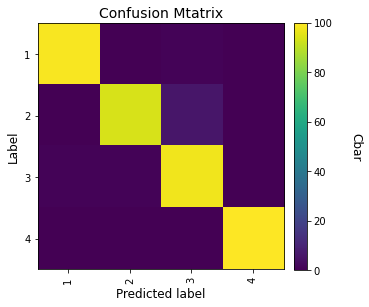

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
cm_array = confusion_matrix(y_ts, y_pred)
plt.imshow(cm_array, interpolation='nearest')
plt.title('Confusion Mtatrix', fontsize=14)

cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Cbar', rotation=270, labelpad=30, fontsize=12)

label = np.unique(y_ts)
pred_label = np.unique(y_pred)
xtick_marks = np.arange(len(label))
ytick_marks = np.arange(len(pred_label))

plt.xticks(xtick_marks, label, rotation=90)
plt.yticks(ytick_marks, pred_label)
plt.tight_layout()
plt.ylabel('Label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

plt.show()

# **SVM Classifier**

In [ ]:
Gamma = np.logspace(-3,3,50)
Cval = np.logspace(-3,3,50)
params = { "gamma": Gamma,
            "C": Cval}
acc = []
P = []
val_acc =[]

cross_valkf = RepeatedKFold(n_splits=5,random_state=999, n_repeats = 3)
clfr_2 = SVC(kernel= 'rbf')
svm_gs = GridSearchCV(estimator=clfr_2, 
                   param_grid=params, 
                   cv=cross_valkf,
                   verbose=1, 
                   scoring='accuracy')
svm_gs.fit(tr_std, y_tr)

acc.append(svm_gs.best_score_)
P.append(svm_gs.best_params_)
yval_pred = svm_gs.predict(X_val1) 
val_acc.append(accuracy_score(y_val1, yval_pred))
Best_Valacc = np.array(val_acc)
Best_P = np.array(P)

print('Best Val Acc: {}'.format(np.max(Best_Valacc)))
print('Mean Val Acc: {}'.format(np.mean(Best_Valacc)))
print('Std Dev of Val Acc: {}'.format(np.std(Best_Valacc)))
print('Best Params: {}'.format(Best_P))

Fitting 15 folds for each of 2500 candidates, totalling 37500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Val Acc: 1.0
Mean Val Acc: 1.0
Std Dev of Val Acc: 0.0
Best Params: [{'C': 2.6826957952797246, 'gamma': 0.49417133613238334}]


[Parallel(n_jobs=1)]: Done 37500 out of 37500 | elapsed: 55.9min finished


SVM Classifier on full Test data

In [ ]:
clfr2 = SVC(kernel = 'rbf', gamma =0.49417133613238334, C= 2.6826957952797246)
clfr2.fit(tr_std, y_tr)
y_pred = clfr2.predict(ts_std)
test_acc = accuracy_score(y_ts, y_pred)
print('Test Acc: {}'.format(test_acc))
print(classification_report(y_ts, y_pred))

Test Acc: 0.9825
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.98      0.96      0.97       100
           3       0.95      0.98      0.97       100
           4       1.00      1.00      1.00       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Plot Confusion Matrix

Text(0.5, 35.8825, 'Predicted label')

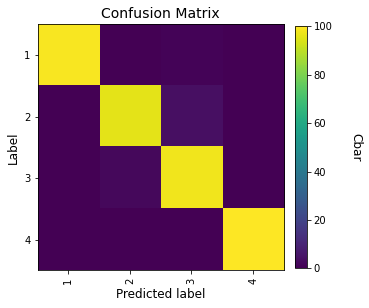

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
cm_array = confusion_matrix(y_ts, y_pred)
plt.imshow(cm_array, interpolation='nearest')
plt.title('Confusion Matrix', fontsize=14)

cbar = plt.colorbar(fraction=0.045, pad=0.04)
cbar.set_label('Cbar', rotation=270, labelpad=30, fontsize=12)

label = np.unique(y_ts)
pred_label = np.unique(y_pred)
xtick_marks = np.arange(len(label))
ytick_marks = np.arange(len(pred_label))

plt.xticks(xtick_marks, label, rotation=90)
plt.yticks(ytick_marks, pred_label)
plt.tight_layout()
plt.ylabel('Label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

In [ ]:
Gamma = np.logspace(-3,3,50)
Cval = np.logspace(-3,3,50)
params = { "gamma": Gamma,
            "C": Cval}
acc = []
P = []
val_acc =[]

cross_valkf = RepeatedKFold(n_splits=5,random_state=999, n_repeats = 3)
clfr_2 = SVC(kernel= 'rbf')
svm_gs = GridSearchCV(estimator=clfr_2, 
                   param_grid=params, 
                   cv=cross_valkf,
                   verbose=1, 
                   scoring='accuracy')
svm_gs.fit(X_train, y_train)

acc.append(svm_gs.best_score_)
P.append(svm_gs.best_params_)
yval_pred = svm_gs.predict(X_val) 
val_acc.append(accuracy_score(y_val, yval_pred))
Best_Valacc = np.array(val_acc)
Best_P = np.array(P)

print('Best Val Acc: {}'.format(np.max(Best_Valacc)))
print('Mean Val Acc: {}'.format(np.mean(Best_Valacc)))
print('Std Dev of Val Acc: {}'.format(np.std(Best_Valacc)))
print('Best Params: {}'.format(Best_P))

Fitting 15 folds for each of 2500 candidates, totalling 37500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Val Acc: 0.225
Mean Val Acc: 0.225
Std Dev of Val Acc: 0.0
Best Params: [{'C': 0.001, 'gamma': 0.001}]


[Parallel(n_jobs=1)]: Done 37500 out of 37500 | elapsed: 30.6min finished


# **k-NN Classifier**

Full Train data

In [ ]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}

#Training and test on validation data
val_acc = [] 
A3 = []
P3 = []
cross_valkf = RepeatedKFold(n_splits=9,random_state=999, n_repeats = 3)
clfr_3 = KNeighborsClassifier()
knn_gs = GridSearchCV(estimator=clfr_3, 
                   param_grid=params, 
                   cv=cross_valkf,
                   verbose=2, 
                   scoring='accuracy')
knn_gs.fit(X, y)

A3.append(knn_gs.best_score_)
P3.append(knn_gs.best_params_)
yval_pred = knn_gs.predict(X_val1) 
val_acc.append(accuracy_score(y_val1, yval_pred))
 
Best_Valacc = np.array(val_acc)
Best_P = np.array(P3)

print('Best Val Acc: {}'.format(np.max(Best_Valacc)))
print('Mean Val Acc: {}'.format(np.mean(Best_Valacc)))
print('Std Dev of Val Acc: {}'.format(np.std(Best_Valacc)))
print('Best Params: {}'.format(Best_P))

Full Test Data

In [ ]:
clfr3 = KNeighborsClassifier(n_neighbors = , p =  )
clfr3.fit(tr_std, y_tr)
y_pred = clfr3.predict(ts_std)
test_acc = accuracy_score(y_ts, y_pred)
print('Test Acc: {}'.format(test_acc))
print(classification_report(y_ts, y_pred))

Plot Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9), dpi=100)
cm_array = confusion_matrix(y_true, y_pred)
plt.imshow(cm_array[:-1, :-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.title(matrix_title, fontsize=14)

cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Class', rotation=270, labelpad=30, fontsize=12)

label = np.unique(y_test)
pred_label = np.unique(y_pred)
xtick_marks = np.arange(len(label))
ytick_marks = np.arange(len(pred_label))

plt.xticks(xtick_marks, label, rotation=90)
plt.yticks(ytick_marks, pred_label)
plt.tight_layout()
plt.ylabel('Label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

In [ ]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}

#Training and test on validation data
val_acc = [] 
A3 = []
P3 = []
cross_valkf = RepeatedKFold(n_splits=9,random_state=999, n_repeats = 3)
clfr_3 = KNeighborsClassifier()
knn_gs = GridSearchCV(estimator=clfr_3, 
                   param_grid=params, 
                   cv=cross_valkf,
                   verbose=2, 
                   scoring='accuracy')
knn_gs.fit(X_train, y_train)

A3.append(knn_gs.best_score_)
P3.append(knn_gs.best_params_)
yval_pred = knn_gs.predict(X_val) 
val_acc.append(accuracy_score(y_val, yval_pred))
 
Best_Valacc = np.array(val_acc)
Best_P = np.array(P3)

print('Best Val Acc: {}'.format(np.max(Best_Valacc)))
print('Mean Val Acc: {}'.format(np.mean(Best_Valacc)))
print('Std Dev of Val Acc: {}'.format(np.std(Best_Valacc)))
print('Best Params: {}'.format(Best_P))

Fitting 27 folds for each of 21 candidates, totalling 567 fits
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] ............................... n_neighbors=1, p=1, total=   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 567 out of 567 | elapsed:    9.5s finished


# Perceptron Classifier

Full Train Data

In [ ]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}

#Training and test on validation data
val_acc = [] 
A3 = []
P3 = []
cross_valkf = RepeatedKFold(n_splits=9,random_state=999, n_repeats = 3)
clfr_4 = KNeighborsClassifier()
pcp_gs = GridSearchCV(estimator=clfr_4, 
                   param_grid=params, 
                   cv=cross_valkf,
                   verbose=1, 
                   scoring='accuracy')
pcp_gs.fit(X, y)

A3.append(pcp_gs.best_score_)
P3.append(pcp_gs.best_params_)
yval_pred = pcp_gs.predict(X_val1) 
val_acc.append(accuracy_score(y_val1, yval_pred))
 
Best_Valacc = np.array(val_acc)
Best_P = np.array(P3)

print('Best Val Acc: {}'.format(np.max(Best_Valacc)))
print('Mean Val Acc: {}'.format(np.mean(Best_Valacc)))
print('Std Dev of Val Acc: {}'.format(np.std(Best_Valacc)))
print('Best Params: {}'.format(Best_P))

Full Test Data

In [ ]:
clfr4 = KNeighborsClassifier(n_neighbors = , p =  )
clfr4.fit(tr_std, y_tr)
y_pred = clfr4.predict(ts_std)
test_acc = accuracy_score(y_ts, y_pred)
print('Test Acc: {}'.format(test_acc))
print(classification_report(y_ts, y_pred))

Plot Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9), dpi=100)
cm_array = confusion_matrix(y_true, y_pred)
plt.imshow(cm_array[:-1, :-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.title(matrix_title, fontsize=14)

cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_label('Class', rotation=270, labelpad=30, fontsize=12)

label = np.unique(y_test)
pred_label = np.unique(y_pred)
xtick_marks = np.arange(len(label))
ytick_marks = np.arange(len(pred_label))

plt.xticks(xtick_marks, label, rotation=90)
plt.yticks(ytick_marks, pred_label)
plt.tight_layout()
plt.ylabel('Label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# **Quadratic Discriminant Analysis**

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


params = {'tol': np.logspace(0, -5, 50), 'reg_param': [0.01, 0.001, 0.0001]}

#Training and test on validation data
val_acc = [] 
A3 = []
P3 = []
cross_valkf = RepeatedKFold(n_splits=5,random_state=999, n_repeats = 3)
clfr_5 = QuadraticDiscriminantAnalysis()
qda_gs = GridSearchCV(estimator=clfr_5, 
                   param_grid=params, 
                   cv=cross_valkf,
                   verbose=1, 
                   scoring='accuracy')
qda_gs.fit(X_train1, y_train1)

A3.append(qda_gs.best_score_)
P3.append(qda_gs.best_params_)
yval_pred = qda_gs.predict(X_val1) 
val_acc.append(accuracy_score(y_val1, yval_pred))
 
Best_Valacc = np.array(val_acc)
Best_P = np.array(P3)

print('Best Val Acc: {}'.format(np.max(Best_Valacc)))
print('Mean Val Acc: {}'.format(np.mean(Best_Valacc)))
print('Std Dev of Val Acc: {}'.format(np.std(Best_Valacc)))
print('Best Params: {}'.format(Best_P))

Fitting 15 folds for each of 150 candidates, totalling 2250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Val Acc: 0.9875
Mean Val Acc: 0.9875
Std Dev of Val Acc: 0.0
Best Params: [{'reg_param': 0.01, 'tol': 1.0}]


[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed:    9.1s finished


In [ ]:
clfr5 = QuadraticDiscriminantAnalysis(reg_param= 0.01, tol= 1.0)
clfr5.fit(tr_std, y_tr)
y_pred = clfr5.predict(ts_std)
test_acc = accuracy_score(y_ts, y_pred)
print('Test Acc: {}'.format(test_acc))
print(classification_report(y_ts, y_pred))

Test Acc: 0.9825
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.99      0.96      0.97       100
           3       0.95      0.98      0.97       100
           4       0.99      1.00      1.00       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Text(0.5, 35.8825, 'Predicted label')

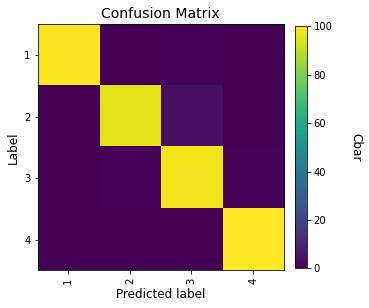

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
cm_array = confusion_matrix(y_ts, y_pred)
plt.imshow(cm_array, interpolation='nearest')
plt.title('Confusion Matrix', fontsize=14)

cbar = plt.colorbar(fraction=0.045, pad=0.04)
cbar.set_label('Cbar', rotation=270, labelpad=30, fontsize=12)

label = np.unique(y_ts)
pred_label = np.unique(y_pred)
xtick_marks = np.arange(len(label))
ytick_marks = np.arange(len(pred_label))

plt.xticks(xtick_marks, label, rotation=90)
plt.yticks(ytick_marks, pred_label)
plt.tight_layout()
plt.ylabel('Label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# **SGD Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

params = { 'alpha': np.logspace(-2,-5, 50), 'tol': np.logspace(0, -4, 50), 'epsilon': [0.1, 0.3, 0.6, 0.9, 0.01, 0.03, 0.06, 0.09]
          }

#Training and test on validation data
val_acc = [] 
A3 = []
P3 = []
cross_valkf = RepeatedKFold(n_splits=5,random_state=999, n_repeats = 3)
clfr_6 = SGDClassifier(penalty= 'l2', random_state=999, shuffle=True, early_stopping=True)
sgd_gs = GridSearchCV(estimator=clfr_6, 
                   param_grid=params, 
                   cv=cross_valkf,
                   verbose=1, 
                   scoring='accuracy')
sgd_gs.fit(X_train1, y_train1)

A3.append(sgd_gs.best_score_)
P3.append(sgd_gs.best_params_)
yval_pred = sgd_gs.predict(X_val1) 
val_acc.append(accuracy_score(y_val1, yval_pred))
 
Best_Valacc = np.array(val_acc)
Best_P = np.array(P3)

print('Best Val Acc: {}'.format(np.max(Best_Valacc)))
print('Mean Val Acc: {}'.format(np.mean(Best_Valacc)))
print('Std Dev of Val Acc: {}'.format(np.std(Best_Valacc)))
print('Best Params: {}'.format(Best_P))

Fitting 15 folds for each of 20000 candidates, totalling 300000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300000 out of 300000 | elapsed: 103.8min finished


Best Val Acc: 0.975
Mean Val Acc: 0.975
Std Dev of Val Acc: 0.0
Best Params: [{'alpha': 0.0006866488450042998, 'epsilon': 0.1, 'tol': 0.08685113737513529}]


In [ ]:
clfr6 = SGDClassifier(alpha= 0.0006866488450042998, tol=0.08685113737513529, epsilon= 0.1 )
clfr6.fit(tr_std, y_tr)
y_pred = clfr6.predict(ts_std)
test_acc = accuracy_score(y_ts, y_pred)
print('Test Acc: {}'.format(test_acc))
print(classification_report(y_ts, y_pred))

Test Acc: 0.965
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.92      0.97      0.94       100
           3       0.96      0.90      0.93       100
           4       0.99      1.00      1.00       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



Text(0.5, 35.8825, 'Predicted label')

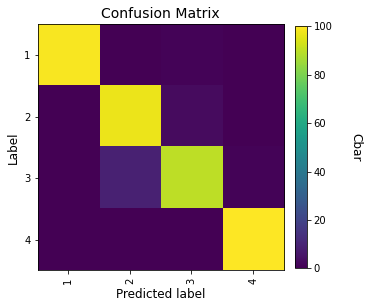

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
cm_array = confusion_matrix(y_ts, y_pred)
plt.imshow(cm_array, interpolation='nearest')
plt.title('Confusion Matrix', fontsize=14)

cbar = plt.colorbar(fraction=0.045, pad=0.04)
cbar.set_label('Cbar', rotation=270, labelpad=30, fontsize=12)

label = np.unique(y_ts)
pred_label = np.unique(y_pred)
xtick_marks = np.arange(len(label))
ytick_marks = np.arange(len(pred_label))

plt.xticks(xtick_marks, label, rotation=90)
plt.yticks(ytick_marks, pred_label)
plt.tight_layout()
plt.ylabel('Label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)